In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
tf.config.run_functions_eagerly(True)

In [18]:
#Loading the IBM stock dataset of the company’s historical price in form of a .csv file
df_mudiaga = pd.read_csv("C:\\Users\\otoja\\MudiagaOtojareri_Lab05\\IBM.csv")

In [19]:
#Explore the data
df_mudiaga.head()
df_mudiaga.columns.values
df_mudiaga.isnull().sum()
df_mudiaga.describe()
df_mudiaga.columns
df_mudiaga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       754 non-null    object 
 1   Open       754 non-null    float64
 2   High       754 non-null    float64
 3   Low        754 non-null    float64
 4   Close      754 non-null    float64
 5   Adj Close  754 non-null    float64
 6   Volume     754 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 41.4+ KB


In [20]:
df_mudiaga.describe()

,Open,High,Low,Close,Adj Close,Volume
count,754.000000,754.000000,754.000000,754.000000,754.000000,7.540000e+02
mean,127.804807,129.008149,126.627854,127.822553,119.246612,5.297480e+06
std,9.731813,9.719821,9.762096,9.785446,12.962614,3.319779e+06
min,102.533463,104.818359,100.305923,101.663483,87.465134,1.842111e+06
25%,119.502869,120.523421,118.430199,119.397705,106.523491,3.669917e+06
50%,128.389999,129.416824,127.335000,128.509995,122.618645,4.561197e+06
75%,135.637497,137.046253,134.713520,135.739040,128.047306,5.866412e+06
max,150.470001,153.210007,149.949997,150.570007,148.742966,3.981442e+07


In [21]:
df_mudiaga.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [22]:
#Setting the date column as the index
df_mudiaga = df_mudiaga.set_index(pd.DatetimeIndex(df_mudiaga['Date'].values))

In [23]:
#Drop the date column
df_mudiaga.drop(columns=['Date'], axis=1, inplace=True)

In [24]:
#Explore the new data
df_mudiaga.head()
df_mudiaga.columns.values
df_mudiaga.isnull().sum()
df_mudiaga.describe()
df_mudiaga.columns
df_mudiaga.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 754 entries, 2020-04-03 to 2023-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       754 non-null    float64
 1   High       754 non-null    float64
 2   Low        754 non-null    float64
 3   Close      754 non-null    float64
 4   Adj Close  754 non-null    float64
 5   Volume     754 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.2 KB


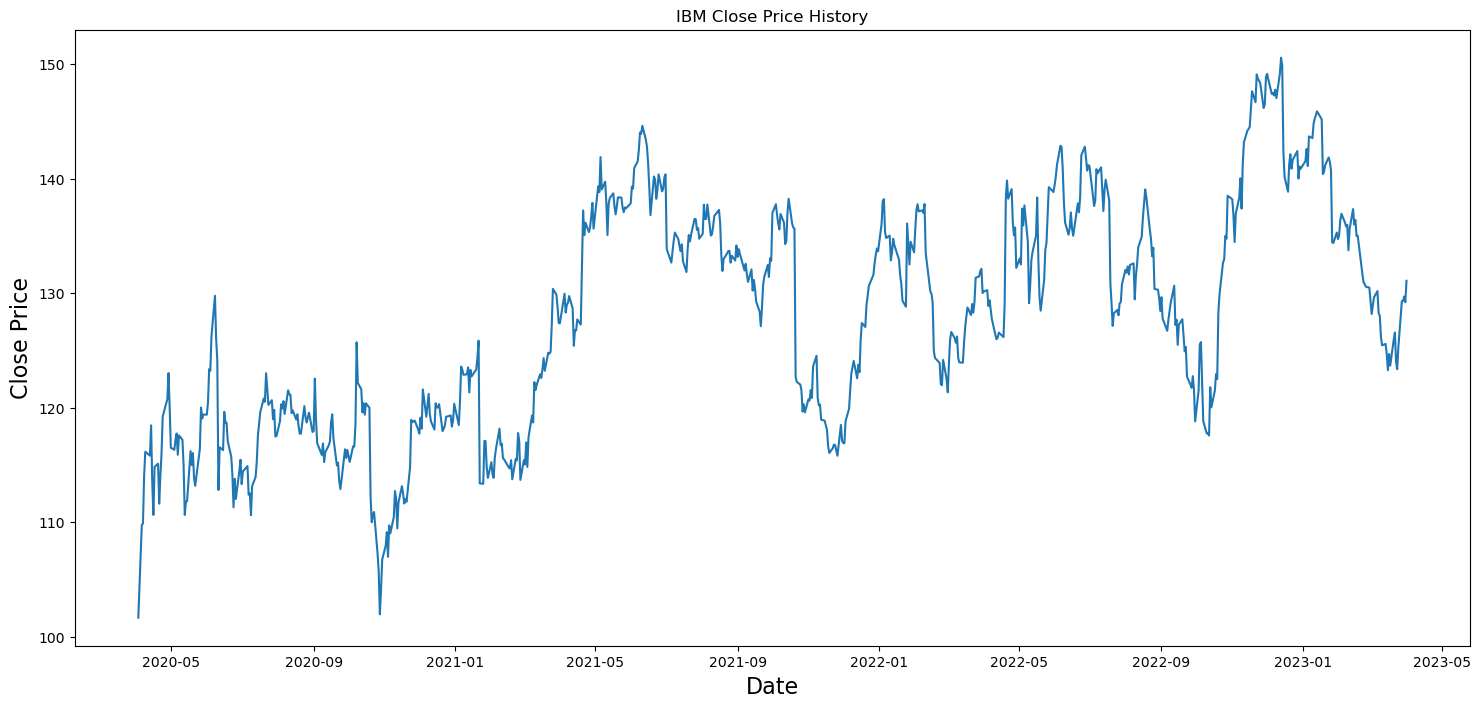

In [25]:
#Visualize the data
plt.figure(figsize=(18,8))
plt.title('IBM Close Price History')
plt.plot(df_mudiaga['Close'])
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.show()

In [44]:
#Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_mudiaga['Close'].values.reshape(-1,1))

In [45]:
# Define the number of days to use for predictions
prediction_days = 60

#Splitting the dataset into training and testing sets, used 60 days for the predictions
train_data = scaled_data[:int(0.8*len(scaled_data))]
test_data = scaled_data[int(0.8*len(scaled_data))-prediction_days:]
print(train_data.shape)
print(test_data.shape)

(603, 1)
(211, 1)


In [46]:
#Define the function
def create_data(dataset, prediction_days):
    x_data = []
    y_data = []
    for i in range(prediction_days, len(dataset)):
        x_data.append(dataset[i-prediction_days:i, 0])
        y_data.append(dataset[i, 0])
    x_data, y_data = np.array(x_data), np.array(y_data)
    x_data = np.reshape(x_data, (len(x_data), prediction_days, 1))
    return x_data, y_data

In [47]:
x_train, y_train = create_data(train_data, prediction_days)
x_test, y_test = create_data(test_data, prediction_days)

In [48]:
#Define the architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [49]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', run_eagerly=True)

In [50]:
# Train the model
model.fit(x_train, y_train, epochs=50, batch_size=32)

C:\Users\otoja\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
17/17 [==============================] - 10s 594ms/step - loss: 0.0715
Epoch 2/50
17/17 [==============================] - 8s 485ms/step - loss: 0.0180
Epoch 3/50
17/17 [==============================] - 8s 477ms/step - loss: 0.0154
Epoch 4/50
17/17 [==============================] - 8s 485ms/step - loss: 0.0130
Epoch 5/50
17/17 [==============================] - 8s 477ms/step - loss: 0.0131
Epoch 6/50
17/17 [==============================] - 8s 491ms/step - loss: 0.0113
Epoch 7/50
17/17 [==============================] - 8s 480ms/step - loss: 0.0115
Epoch 8/50
17/17 [==============================] - 8s 478ms/step - loss: 0.0113
Epoch 9/50
17/17 [==============================] - 8s 474ms/step - loss: 0.0115
Epoch 10/50
17/17 [==============================] - 8s 467ms/step - loss: 0.0112
Epoch 11/50
17/17 [==============================] - 8s 479ms/step - loss: 0.0110
Epoch 12/50
17/17 [==============================] - 9s 508ms/step - loss: 0.0103
Epoch 13/50
17/17 [=====

In [54]:
#Making predictions for the model
predictions = []
for i in range(len(x_test)):
    prediction = model.predict(tf.convert_to_tensor(x_test[i:i+1]))
    predictions.append(prediction[0][0])
predictions = np.array(predictions)

1/1 [==============================] - 0s 215ms/step


In [55]:
#Scaling the predictions
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

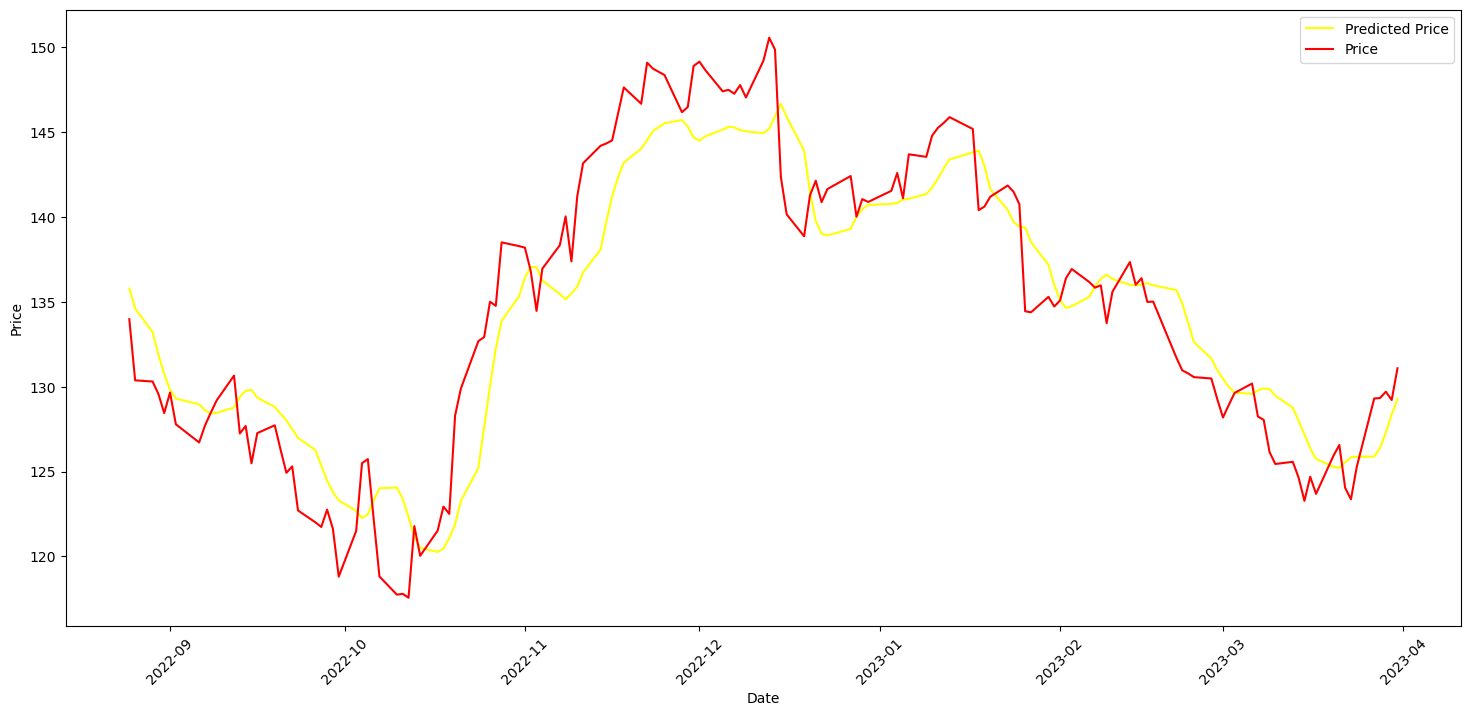

In [56]:
# Plot the predictions
plt.figure(figsize=(18, 8))
plt.plot(df_mudiaga.index[-len(predictions):], predictions, color='yellow', label='Predicted Price')
plt.plot(df_mudiaga.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), color='red', label='Price')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()